Following this tutorial: https://www.youtube.com/watch?v=Lsue2gEM9D0

In [3]:
import pandas as pd
import numpy as np
import random
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [17]:
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

In [18]:
genes = ['gene' + str(i) for i in range(1, 101)]
wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]
train = pd.DataFrame(columns=[*wt, *ko], index=genes) 

In [19]:
for gene in train.index:
    train.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=random.randrange(10, 1000), size=5)
    train.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=random.randrange(10, 1000), size=5)

In [20]:
np.random.poisson(lam=random.randrange(10, 1000), size=5)

array([772, 822, 787, 807, 789])

In [24]:
scaled_data = preprocessing.scale(train.T)

c:\users\spurius\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [29]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [30]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

In [44]:
per_var

array([88. ,  2.9,  2.6,  2. ,  1.3,  1.1,  0.9,  0.8,  0.5,  0. ])

In [34]:
labels = ['PC' + str(i) for i in range(1, len(per_var) + 1)]

In [35]:
labels

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

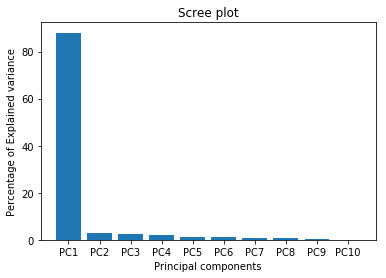

In [40]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.xlabel('Principal components')
plt.ylabel('Percentage of Explained variance')
plt.title('Scree plot')
plt.show()

In [43]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,9.290662,1.454840,2.778337,-0.161513,-0.368163,-1.461201,-0.058997,-1.276158,0.091677,5.702722e-18
wt2,9.484024,0.922650,1.420756,-1.363478,-0.912922,1.214718,-0.478313,1.662452,0.162959,-4.490647e-16
wt3,9.625105,-2.326359,-0.690501,0.132251,-0.101013,1.833568,-0.164245,-1.430639,0.072360,-2.878293e-16
wt4,9.066786,-0.696670,-2.345879,1.101314,0.304736,-1.423421,-1.515359,0.580977,0.128870,4.931601e-16
wt5,9.442631,0.666059,-1.180894,0.296212,1.099387,-0.223156,2.179738,0.472976,-0.470544,2.135059e-16
ko1,-9.470574,3.045485,-1.878115,-1.462397,0.098973,0.458349,-0.611449,-0.681480,-0.768037,7.860457e-16
ko2,-9.283365,-1.357484,-1.159667,-1.394359,-1.852349,-0.831874,0.871596,-0.019338,0.956653,7.917896e-16
ko3,-9.334498,0.194676,0.751872,3.185390,-1.415286,0.379646,0.144804,0.257156,-0.688513,1.186861e-15
ko4,-9.328492,0.877803,0.710570,0.924931,1.867645,0.540323,-0.100613,0.079401,1.500641,6.178716e-16
ko5,-9.492280,-2.781000,1.593520,-1.258351,1.278992,-0.486953,-0.267162,0.354653,-0.986067,5.470996e-16


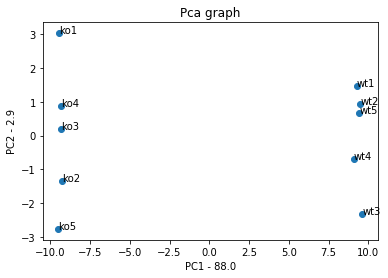

In [46]:
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('PC1 - {}'.format(per_var[0]))
plt.ylabel('PC2 - {}'.format(per_var[1]))
plt.title('Pca graph')
for sample in pca_df.index:
    plt.annotate(sample, (pca_df['PC1'].loc[sample], pca_df['PC2'].loc[sample]))
plt.show()

In [47]:
loading_scores = pd.Series(pca.components_[0], index=genes)

In [49]:
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

In [51]:
sorted_loading_scores[:10]

gene97    0.106531
gene31    0.106524
gene2     0.106516
gene5     0.106438
gene99    0.106428
gene20    0.106405
gene88    0.106389
gene44    0.106389
gene54    0.106388
gene1     0.106387
dtype: float64